
# **Data Visualization Project**
**Student:** Kevin Davide Dextre Gonzales  
**ID:** 899926

# **Import and upload Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.ticker import ScalarFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import geopandas as gpd
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [2]:
# Results
results_df = pd.read_csv("results.csv")
pd.set_option("display.width", 2000)
pd.set_option("display.max_columns", None)

In [3]:
results_df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False


In [4]:
results_df.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
48840,2025-11-18,Austria,Bosnia and Herzegovina,1.0,1.0,FIFA World Cup qualification,Vienna,Austria,False
48841,2025-11-18,Romania,San Marino,7.0,1.0,FIFA World Cup qualification,Ploiești,Romania,False
48842,2025-11-18,Wales,North Macedonia,7.0,1.0,FIFA World Cup qualification,Cardiff,Wales,False
48843,2025-11-18,Belgium,Liechtenstein,7.0,0.0,FIFA World Cup qualification,Liège,Belgium,False
48844,2025-11-18,Dominican Republic,Martinique,0.0,0.0,CONCACAF Series,Santiago de los Caballeros,Dominican Republic,False
48845,2025-11-18,Saint Kitts and Nevis,Belize,2.0,6.0,CONCACAF Series,Basseterre,Saint Kitts and Nevis,False
48846,2025-11-18,Antigua and Barbuda,Guyana,1.0,4.0,CONCACAF Series,North Sound,Antigua and Barbuda,False
48847,2025-11-18,Iran,Uzbekistan,0.0,0.0,Al Ain International Cup,Al Ain,United Arab Emirates,True
48848,2025-11-19,Laos,Vietnam,0.0,2.0,AFC Asian Cup qualification,Vientiane,Laos,False
48849,2025-11-20,Vanuatu,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Port Moresby,Papua New Guinea,True


# **Dataset cleaning and transformation**

In [5]:
# Looking for null values

results_df.info()
results_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48850 entries, 0 to 48849
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        48850 non-null  object 
 1   home_team   48850 non-null  object 
 2   away_team   48850 non-null  object 
 3   home_score  48849 non-null  float64
 4   away_score  48849 non-null  float64
 5   tournament  48850 non-null  object 
 6   city        48850 non-null  object 
 7   country     48850 non-null  object 
 8   neutral     48850 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 3.0+ MB


,0
date,0
home_team,0
away_team,0
home_score,1
away_score,1
tournament,0
city,0
country,0
neutral,0


The dataset has only one row with null values, and I fixed it manually by going to look for it

In [6]:
# Show the row where home_score is NaN
results_df[results_df['home_score'].isna()]

# Or, if you want to check away_score as well
results_df[results_df['home_score'].isna() | results_df['away_score'].isna()]

# Find the index of the row with NaN in home_score or away_score
idx = results_df[results_df['home_score'].isna() | results_df['away_score'].isna()].index

# Update the values
results_df.loc[idx, 'home_score'] = 2
results_df.loc[idx, 'away_score'] = 2

# Check for remaining NaN values
results_df.isna().sum()

,0
date,0
home_team,0
away_team,0
home_score,0
away_score,0
tournament,0
city,0
country,0
neutral,0


In [7]:
# Convert the 'date' column to datetime
results_df['date'] = pd.to_datetime(results_df['date'], errors='coerce')

# Convert the score into int
results_df['home_score'] = results_df['home_score'].astype('Int64')
results_df['away_score'] = results_df['away_score'].astype('Int64')

results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Check all unique values ​​for columns of interest

print("Home teams:", results_df['home_team'].nunique())
print("Away teams:", results_df['away_team'].nunique())
print("City:", results_df['city'].nunique())
print("Tournament:", results_df['tournament'].nunique())

Home teams: 325
Away teams: 318
City: 2123
Tournament: 190


In [9]:
# Cleans and standardizes text in the specified columns:
# .str.strip() removes leading/trailing spaces
# .str.title() converts text to Title Case
# Example: " united states " → "United States"

results_df['home_team'] = results_df['home_team'].str.strip().str.title()
results_df['away_team'] = results_df['away_team'].str.strip().str.title()
results_df['city'] = results_df['city'].str.strip().str.title()
results_df['tournament'] = results_df['tournament'].str.strip().str.title()

# Check all unique values ​​for columns of interest
print("Home teams:", results_df['home_team'].nunique())
print("Away teams:", results_df['away_team'].nunique())
print("City:", results_df['city'].nunique())
print("Tournament:", results_df['tournament'].nunique())

Home teams: 325
Away teams: 318
City: 2123
Tournament: 190


In [10]:
# Show all duplicate rows considering all columns

results_df[results_df.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [11]:
# Show the number of null values per column
print("Null values per column:")
print(results_df.isnull().sum())

# Check if there are any null values in the dataset
if results_df.isnull().values.any():
    print("\nThere are null values in the dataset.")
else:
    print("\nNo null values in the dataset.")

Null values per column:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

No null values in the dataset.


In [12]:
# Print negative values
results_df[(results_df['home_score'] < 0) | (results_df['away_score'] < 0)]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


# **Feature Engineering**

In [13]:
# Data extraction by month, year and day for any analysis

results_df['year'] = results_df['date'].dt.year
results_df['month'] = results_df['date'].dt.month
results_df['day'] = results_df['date'].dt.day

In [14]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4


In [15]:
# Added Match Winner

results_df['match_winner'] = results_df.apply(lambda row: 'Home' if row['home_score'] > row['away_score']
                                        else 'Away' if row['home_score'] < row['away_score']
                                        else 'Draw', axis=1)
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,match_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,6,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4,Home


In [16]:
# Definition of function era

def era_from_year(y):
    if y <= 1913:
        return "Pioneers"
    elif y <= 1949:
        return "Interwar & World Wars"
    elif y <= 1973:
        return "Modernization"
    elif y <= 1991:
        return "Globalization"
    elif y <= 2009:
        return "Modern Football"
    else:
        return "Contemporary Football"

results_df['era'] = results_df['year'].apply(era_from_year)

In [17]:
# Adding total goals

results_df["total_goals"] = results_df["home_score"] + results_df["away_score"]
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,match_winner,era,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,Draw,Pioneers,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,Home,Pioneers,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7,Home,Pioneers,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,6,Draw,Pioneers,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4,Home,Pioneers,3


In [18]:
# Save new dataset as results_cleaned
results_df.to_csv("results_cleaned.csv", index=False)

# **Exploratory Data Analysis (EDA)**

The exploratory analysis focuses on addressing five key pillars of football research:

### 1. From Origins to Modernity  
**Research Question:** *From the Pioneer Era to the Modern Era: How Has Football Changed Over Time?*  
This analysis examines the structural evolution of football by dividing its history into distinct eras. We investigate whether the game has become more tactical and defensive or whether the level of entertainment has increased.

### 2. Decoding the Match Outcome  
**Research Question:** *How are goals distributed in international football?*  
A statistical study on goal distribution. Histograms and other visualizations are used to analyze scoring patterns in international matches.

### 3. The Weight of the Pitch (Home Advantage)  
**Research Question:** *Does playing at home really provide an advantage in international football?*  
An empirical validation of the “home advantage” effect. We analyze the win percentages of host teams to determine whether crowd support and stadium familiarity still influence match outcomes.

### 4. The Expansion of the Phenomenon  
**Research Question:** *How has international football evolved over time in terms of match frequency?*  
A temporal analysis tracing the exponential growth in the number of matches played each year, highlighting how football has become a global and ubiquitous phenomenon.

### 5. The Geography of Football  
**Research Question:** *Which countries host the most international matches?*  
A geographical analysis that connects football with spatial distribution, identifying the countries that host the highest number of international games.


# **1. From Pioneers to Modern era: How Has Football Changed Over the era?**


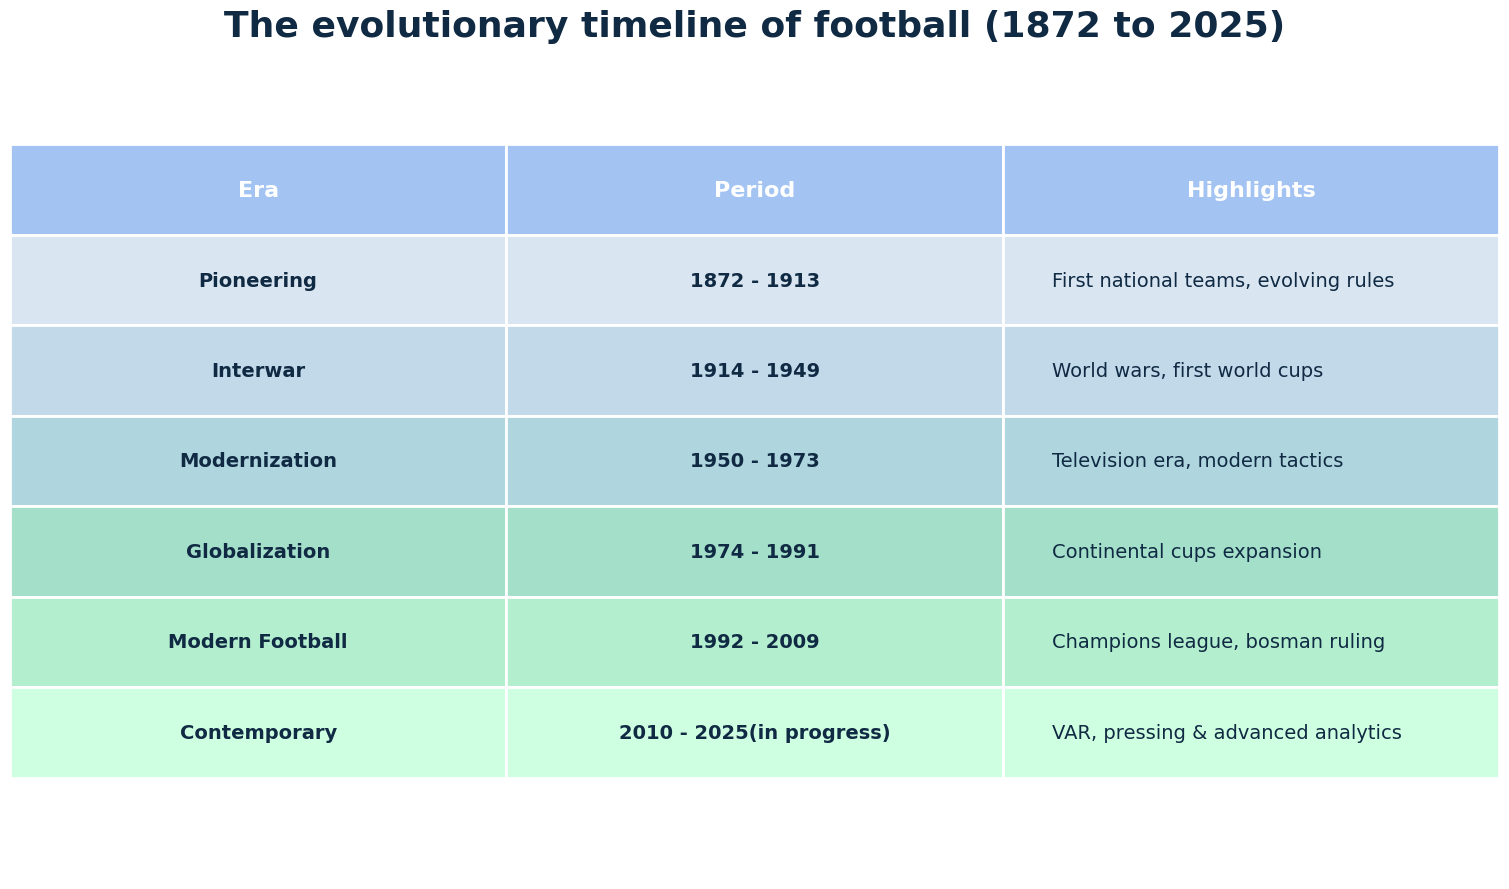

In [19]:
# Create table of eras and highlights
# This dictionary defines the historical eras of football,
# their time periods, and the main innovations or events of each era.
data = {
    "Era": ["Pioneering", "Interwar", "Modernization", "Globalization", "Modern Football", "Contemporary"],
    "Period": ["1872 - 1913", "1914 - 1949", "1950 - 1973", "1974 - 1991", "1992 - 2009", "2010 - 2025(in progress)"],
    "Highlights": [
        "First national teams, evolving rules",
        "World wars, first world cups",
        "Television era, modern tactics",
        "Continental cups expansion",
        "Champions league, bosman ruling",
        "VAR, pressing & advanced analytics"
    ]
}

# Convert the dictionary into a Pandas DataFrame
df = pd.DataFrame(data)
n_rows = len(df)
cmap = LinearSegmentedColormap.from_list(
    "football_light",
    [
        "#D9E6F2",
        "#B3D1E5",
        "#A0E3C3",
        "#CFFFE1"
    ]
)

# Generate gradient colors for each table row
gradient_colors = [cmap(i) for i in np.linspace(0, 1, n_rows)]
header_bg = "#A3C4F3"
text_color = "#102A43"

# Create the matplotlib figure and remove axes
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center',
    colColours=[header_bg] * len(df.columns)
)

# Adjust font size and scale for better readability
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.1, 4.5)

# Style header and body cells
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white', fontsize=16)
        cell.set_edgecolor('white')
        cell.set_linewidth(2)
    else:
        cell.set_facecolor(gradient_colors[row - 1])
        cell.set_edgecolor('white')
        cell.set_linewidth(2)
        cell.set_text_props(
            color=text_color,
            weight='bold' if col < 2 else 'normal'
        )

        if col == 2:
            cell.get_text().set_ha('left')
            cell.get_text().set_position((0.05, 0.5))

plt.title(
    "The evolutionary timeline of football (1872 to 2025)",
    fontsize=26,
    fontweight='black',
    color=text_color,
    pad=-100
)

plt.tight_layout()
plt.show()


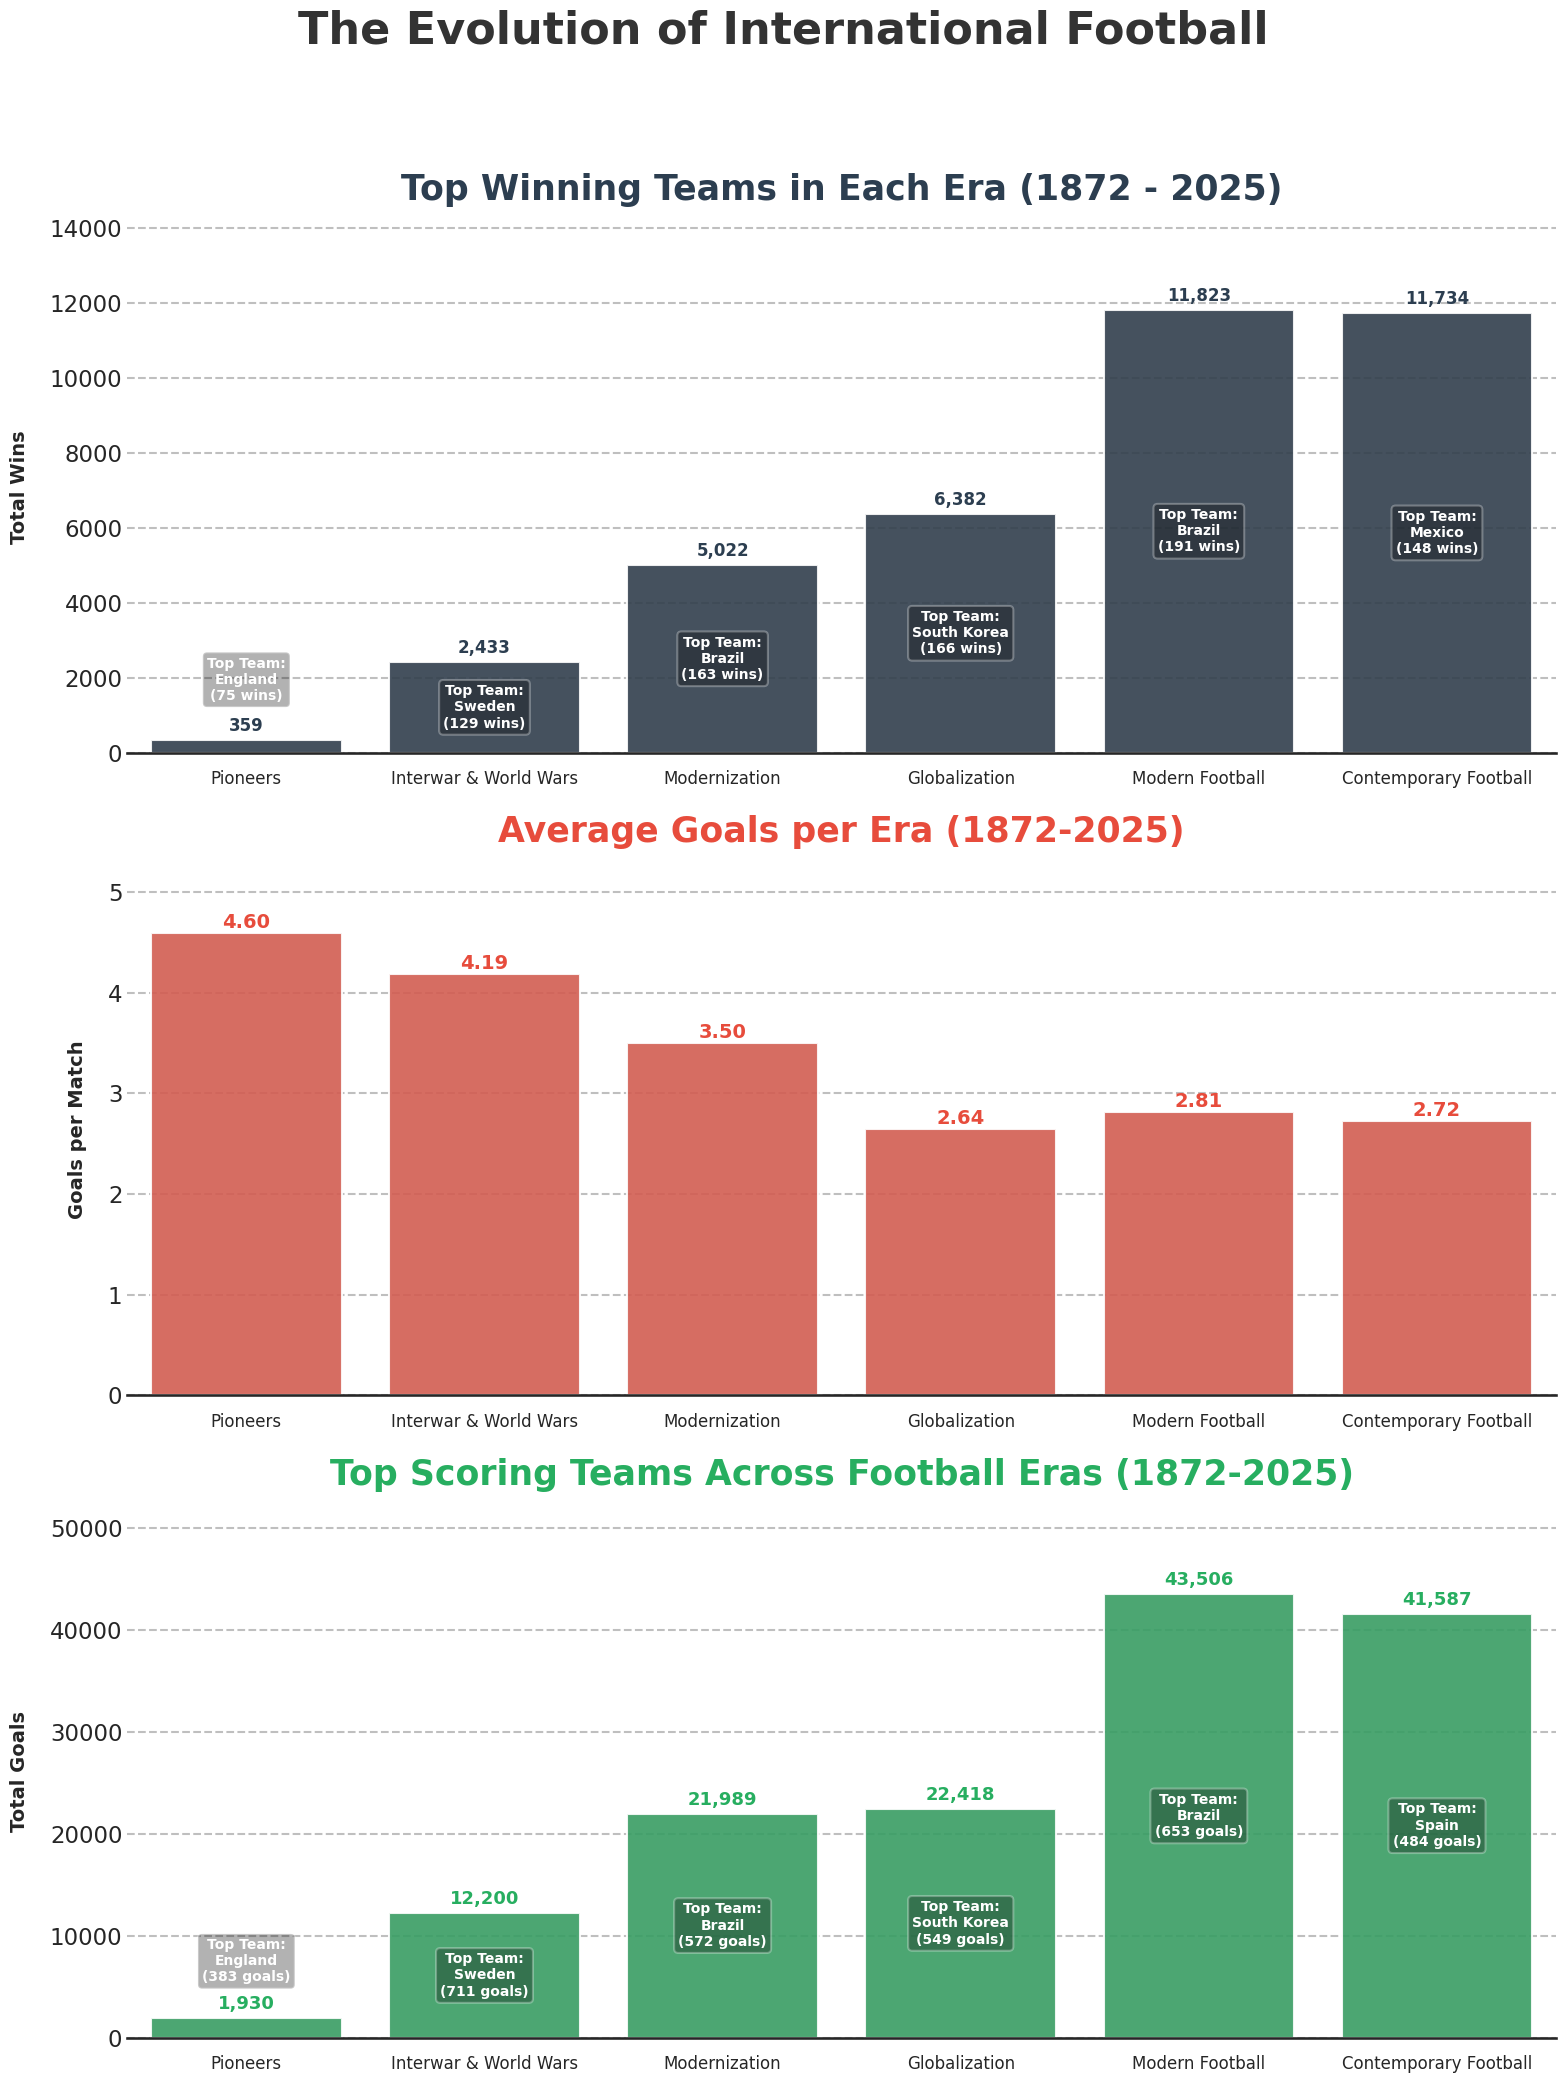

In [20]:
# Total matches per era
epoca_stats = results_df.groupby('era').agg(
    total_matches=('date', 'count')
).reset_index()

# Home team data
home_data = results_df[['era', 'home_team', 'home_score', 'match_winner']].copy()
home_data.columns = ['era', 'team', 'goals_scored', 'match_result']
home_data['is_winner'] = home_data['match_result'] == 'Home'

# Away team data
away_data = results_df[['era', 'away_team', 'away_score', 'match_winner']].copy()
away_data.columns = ['era', 'team', 'goals_scored', 'match_result']
away_data['is_winner'] = away_data['match_result'] == 'Away'

# Merge home and away
melted_teams = pd.concat([home_data, away_data])

# Team stats per era
team_stats_by_era = melted_teams.groupby(['era', 'team']).agg(
    wins=('is_winner', 'sum'),
    goals=('goals_scored', 'sum')
).reset_index()

# Total wins per era
wins_per_era = team_stats_by_era.groupby('era').agg(
    total_wins=('wins', 'sum')
).reset_index()

# Top wins per era
top_wins_per_era = team_stats_by_era.loc[
    team_stats_by_era.groupby('era')['wins'].idxmax()
].rename(columns={'team': 'top_team_wins', 'wins': 'top_wins'})

# Top goals per era
top_goals_per_era = team_stats_by_era.loc[
    team_stats_by_era.groupby('era')['goals'].idxmax()
].rename(columns={'team': 'top_team_goals', 'goals': 'top_goals'})

# Merge stats
epoca_stats = epoca_stats.merge(wins_per_era, on='era', how='left')
epoca_stats = epoca_stats.merge(
    top_wins_per_era[['era', 'top_team_wins', 'top_wins']], on='era', how='left'
)
epoca_stats = epoca_stats.merge(
    top_goals_per_era[['era', 'top_team_goals', 'top_goals']], on='era', how='left'
)

# Total goals per era
epoca_goals = results_df.groupby('era').agg(
    home_goals=('home_score', 'sum'),
    away_goals=('away_score', 'sum')
).reset_index()

epoca_goals['total_goals'] = epoca_goals['home_goals'] + epoca_goals['away_goals']

epoca_stats = epoca_stats.merge(
    epoca_goals[['era', 'total_goals']], on='era', how='left'
)

# Average goals per match
epoca_stats['avg_goals_per_match'] = (
    epoca_stats['total_goals'] / epoca_stats['total_matches']
)

# Order eras
ordered_eras = [
    "Pioneers",
    "Interwar & World Wars",
    "Modernization",
    "Globalization",
    "Modern Football",
    "Contemporary Football"
]

epoca_stats['era'] = pd.Categorical(
    epoca_stats['era'],
    categories=ordered_eras,
    ordered=True
)
epoca_stats = epoca_stats.sort_values('era').reset_index(drop=True)

# Style configuration

sns.set_context("talk")
sns.set_style("white")
color_wins = "#2c3e50"
color_avg = "#e74c3c"
color_goals = "#27ae60"

fig, axes = plt.subplots(3, 1, figsize=(16, 22))
fig.suptitle(
    "The Evolution of International Football",
    fontsize=32, weight='bold', y=0.98, color="#333333"
)

def clean_chart(ax, y_label):
    ax.grid(axis='y', linestyle='--', alpha=0.5, color='gray')
    sns.despine(left=True, bottom=False)
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_ylabel(y_label, fontsize=14, weight='bold', labelpad=15)
    ax.set_xlabel("")

# CHART 1: Total wins
sns.barplot(
    x='era', y='total_wins',
    data=epoca_stats, ax=axes[0],
    color=color_wins, alpha=0.9
)
axes[0].set_title(
    "Top Winning Teams in Each Era (1872 - 2025)",
    fontsize=25, weight='bold', loc='center', pad=15, color=color_wins
)
clean_chart(axes[0], "Total Wins")

y_max_1 = epoca_stats['total_wins'].max()
axes[0].set_ylim(0, y_max_1 * 1.2)

for i, row in epoca_stats.iterrows():
    axes[0].text(
        i, row['total_wins'] + (y_max_1 * 0.02),
        f"{int(row['total_wins']):,}",
        ha='center', fontsize=12, weight='bold', color=color_wins
    )
    y_offset = y_max_1 * 0.15 if row['era'] == "Pioneers" else 0
    axes[0].annotate(
        f"Top Team:\n{row['top_team_wins']}\n({row['top_wins']} wins)",
        xy=(i, row['total_wins'] / 2 + y_offset),
        ha='center', va='center',
        fontsize=10, color='white', weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="black", alpha=0.3)
    )

# CHART 2: Average goals
sns.barplot(
    x='era', y='avg_goals_per_match',
    data=epoca_stats, ax=axes[1],
    color=color_avg, alpha=0.9
)
axes[1].set_title(
    "Average Goals per Era (1872-2025)",
    fontsize=25, weight='bold', loc='center', pad=15, color=color_avg
)
clean_chart(axes[1], "Goals per Match")

y_max_2 = epoca_stats['avg_goals_per_match'].max()
axes[1].set_ylim(0, y_max_2 * 1.15)

for i, v in enumerate(epoca_stats['avg_goals_per_match']):
    axes[1].text(
        i, v + 0.05, f"{v:.2f}",
        ha='center', fontsize=14, weight='bold', color=color_avg
    )

# CHART 3: Total goals
sns.barplot(
    x='era', y='total_goals',
    data=epoca_stats, ax=axes[2],
    color=color_goals, alpha=0.9
)
axes[2].set_title(
    "Top Scoring Teams Across Football Eras (1872-2025)",
    fontsize=25, weight='bold', loc='center', pad=15, color=color_goals
)
clean_chart(axes[2], "Total Goals")

y_max_3 = epoca_stats['total_goals'].max()
axes[2].set_ylim(0, y_max_3 * 1.2)

for i, row in epoca_stats.iterrows():
    axes[2].text(
        i, row['total_goals'] + (y_max_3 * 0.02),
        f"{int(row['total_goals']):,}",
        ha='center', fontsize=13, weight='bold', color=color_goals
    )
    y_offset = y_max_3 * 0.15 if row['era'] == "Pioneers" else 0
    axes[2].annotate(
        f"Top Team:\n{row['top_team_goals']}\n({row['top_goals']} goals)",
        xy=(i, row['total_goals'] / 2 + y_offset),
        ha='center', va='center',
        fontsize=10, color='white', weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="black", alpha=0.3)
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **2. Decoding the scoreline: How are goals distributed in international football?**

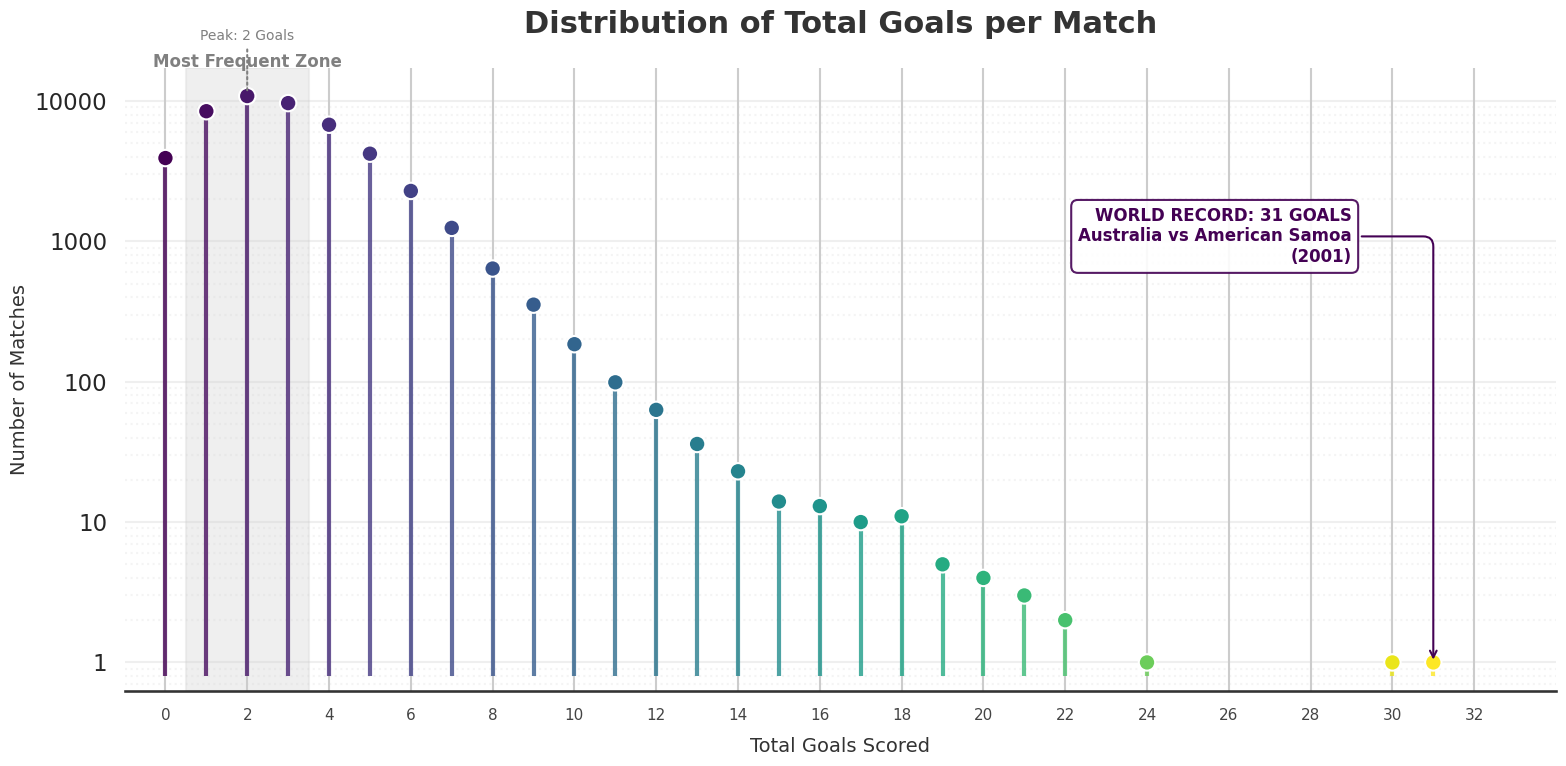

In [47]:
# Setup Style
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["font.family"] = "DejaVu Sans"

# Data Preparation
goal_counts = results_df['total_goals'].value_counts().sort_index()
max_goals_val = results_df['total_goals'].max()
top_frequent = goal_counts.nlargest(3).index.sort_values()
most_common_goal = goal_counts.idxmax()
most_common_count = goal_counts.max()
fig, ax = plt.subplots(figsize=(16, 8))

# Log scale
ax.set_yscale('log')

cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=max_goals_val)
colors = cmap(norm(goal_counts.index))

# Highlight the "Most Common Zone"
ax.axvspan(top_frequent[0] - 0.5, top_frequent[-1] + 0.5,
           color='#e1e1e1', alpha=0.5, zorder=0, label='Most Common Outcomes')

ax.text(top_frequent[1], goal_counts.max() * 1.5, "Most Frequent Zone",
        ha='center', va='bottom', fontsize=12, color='gray', fontweight='bold')
ax.vlines(x=goal_counts.index, ymin=0.8, ymax=goal_counts.values,
          color=colors, alpha=0.8, linewidth=3)

scatter = ax.scatter(x=goal_counts.index, y=goal_counts.values,
                     c=colors, s=140, zorder=3, edgecolors='white', linewidth=1.5)

# Annotations

record_match = results_df[results_df['total_goals'] == max_goals_val].iloc[0]
record_text = (f"WORLD RECORD: {max_goals_val} GOALS\n"
               f"{record_match['home_team']} vs {record_match['away_team']}\n"
               f"({record_match['date'].strftime('%Y')})")

ax.annotate(record_text,
            xy=(max_goals_val, 1),
            xytext=(max_goals_val - 2, most_common_count * 0.1),
            arrowprops=dict(arrowstyle="->", color='#440154', connectionstyle="angle,angleA=0,angleB=90,rad=10", linewidth=1.5),
            fontsize=12, color='#440154', fontweight='bold', ha='right', va='center',
            bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#440154", alpha=0.9))

# Most common peak
ax.annotate(f"Peak: {most_common_goal} Goals",
            xy=(most_common_goal, most_common_count),
            xytext=(most_common_goal, most_common_count * 2.5),
            arrowprops=dict(arrowstyle="-", color='gray', linestyle=":"),
            fontsize=10, color='gray', ha='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#333333')
ax.grid(True, which="major", axis='y', linestyle='-', alpha=0.3, color='#cccccc')
ax.grid(True, which="minor", axis='y', linestyle=':', alpha=0.2, color='#cccccc')

# Labels
plt.title("Distribution of Total Goals per Match", fontsize=22, color='#333333', fontweight='bold', pad=25)
plt.xlabel("Total Goals Scored", fontsize=14, color='#333333', labelpad=10)
plt.ylabel("Number of Matches", fontsize=14, color='#333333')
plt.xticks(range(0, max_goals_val+2, 2), fontsize=11, color='#444444')
plt.xlim(-1, max_goals_val + 3)
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.tight_layout()
plt.show()

# **3. Does playing at home really give an advantage in international football?**

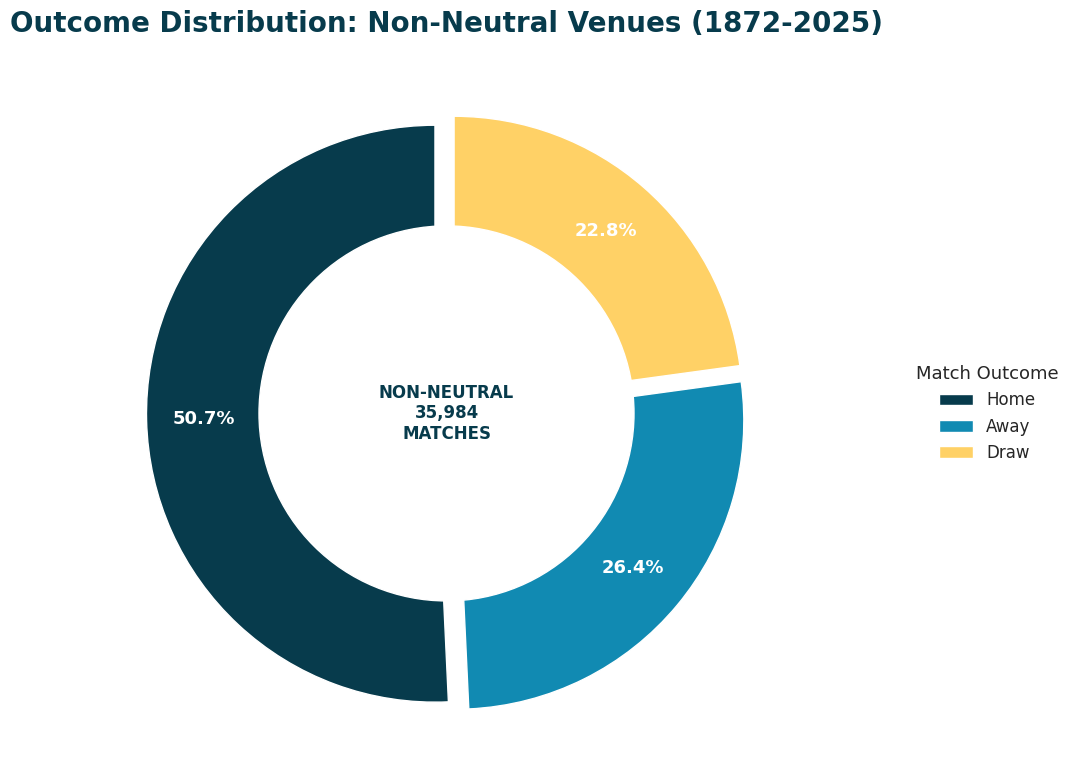

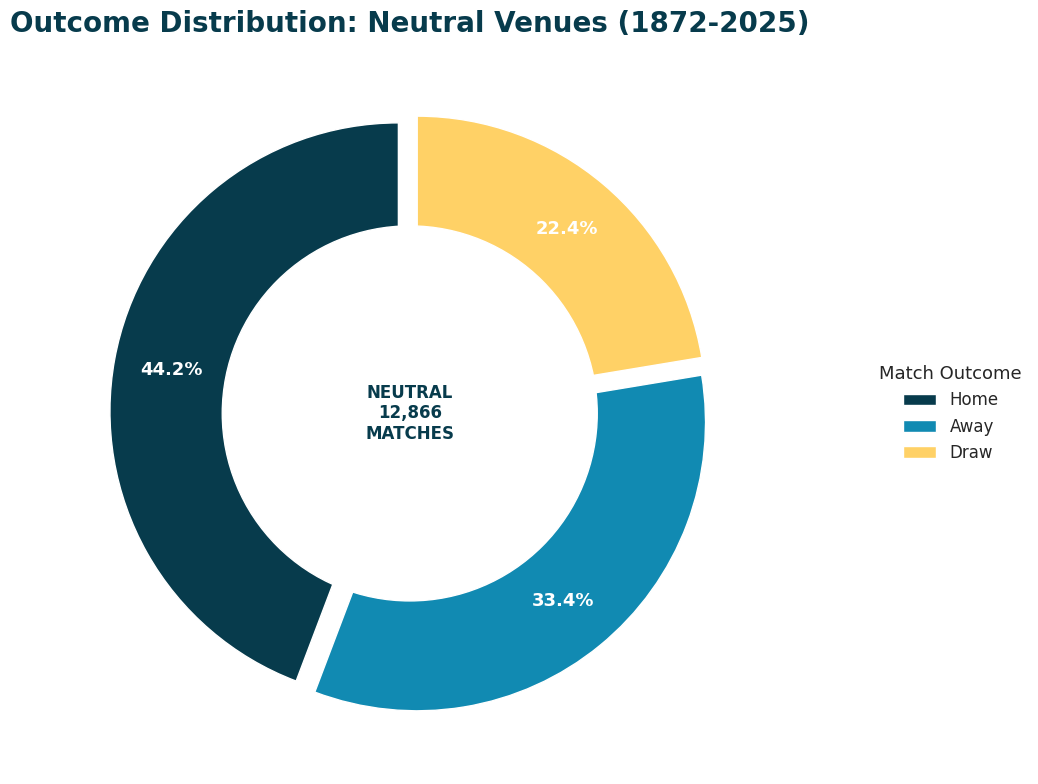

In [46]:
# Setup theme
sns.set_theme(style="white")
plt.rcParams["font.family"] = "DejaVu Sans"
solar_palette = ["#073B4C", "#118AB2", "#FFD166"]

labels_dict = {"Home Win": "Home Team Win", "Away Win": "Away Team Win", "Draw": "Draw"}

def create_outcome_donut(df, title, total_label, filename):
    counts = df['match_winner'].value_counts()
    mapped_labels = [labels_dict.get(l, l) for l in counts.index]
    fig, ax = plt.subplots(figsize=(10, 8))

    # Donut Chart
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=solar_palette,
        pctdistance=0.80,
        explode=[0.04]*len(counts),
        textprops={'fontsize': 13, 'fontweight': 'bold', 'color': 'white'}
    )
    centre_circle = plt.Circle((0,0), 0.65, fc='white')
    ax.add_artist(centre_circle)

    # Text with total
    ax.text(0, 0, f"{total_label}\n{len(df):,}\nMATCHES",
            ha='center', va='center', fontsize=12, fontweight='bold', color='#073B4C')

    # Title and Legend
    plt.title(title, fontsize=20, fontweight='bold', pad=15, color='#073B4C')
    plt.legend(
        wedges,
        mapped_labels,
        title="Match Outcome",
        loc="center",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12,
        title_fontsize=13
    )

    plt.tight_layout()
    plt.show()

# CHART 1: NON-Neutral Matches
non_neutral_df = results_df[results_df['neutral'] == False]
create_outcome_donut(
    non_neutral_df,
    "Outcome Distribution: Non-Neutral Venues (1872-2025)",
    "NON-NEUTRAL",
    "non_neutral_donut.png"
)

# CHART 2: Neutral Matches
neutral_df = results_df[results_df['neutral'] == True]
create_outcome_donut(
    neutral_df,
    "Outcome Distribution: Neutral Venues (1872-2025)",
    "NEUTRAL",
    "neutral_donut.png"
)


# **4. How has international football evolved over time in terms of match frequency?**

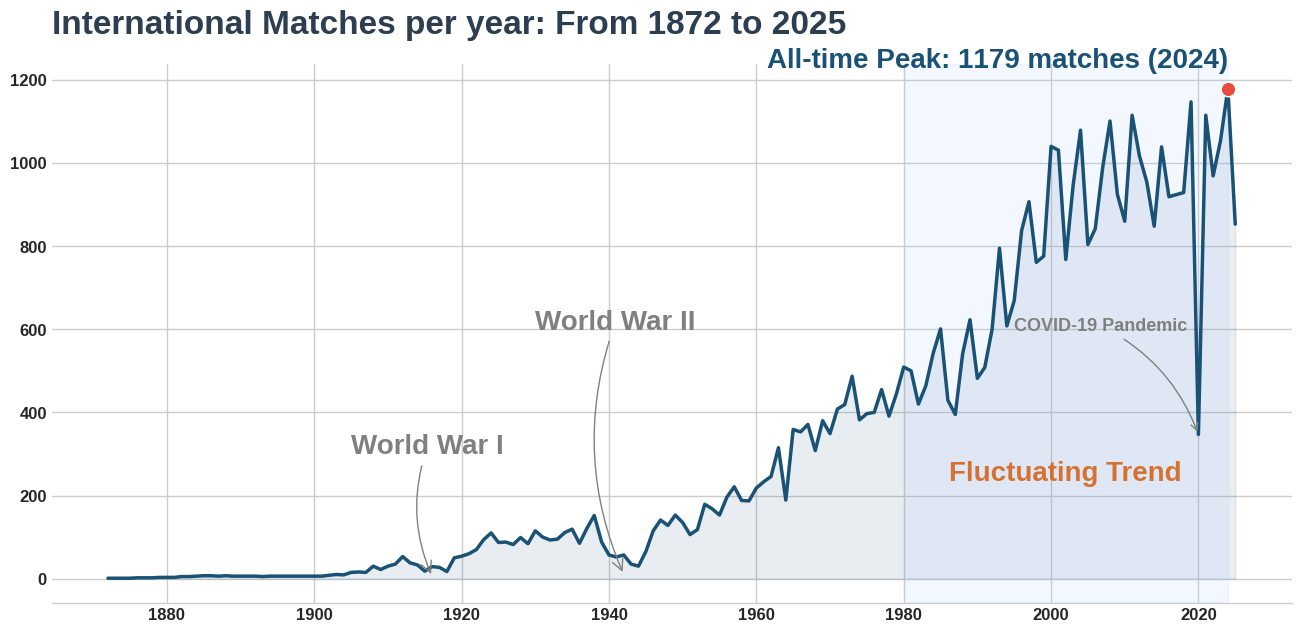

In [31]:
# Convert date column to datetime and extract year
results_df["date"] = pd.to_datetime(results_df["date"], errors="coerce")
results_df["year"] = results_df["date"].dt.year

# Count matches per year
matches_per_year = results_df["year"].value_counts().sort_index()
all_years = pd.Series(index=range(1872, results_df["year"].max() + 1))
matches_per_year = matches_per_year.reindex(all_years.index, fill_value=0)
matches_per_year.index = matches_per_year.index.astype(int)

# Style configuration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["font.family"] = "sans-serif"
color_hist = "#1A5276"
color_recent = "#D35400"
color_highlight = "#F39C12"

# Full timeline
fig1, ax1 = plt.subplots(figsize=(16, 7))

ax1.fill_between(matches_per_year.index, matches_per_year.values,
                 color=color_hist, alpha=0.1)
ax1.plot(matches_per_year.index, matches_per_year.values,
          color=color_hist, linewidth=2.5)

# Highlight recent decades (1980–2024)
ax1.axvspan(1980, 2024, color='#AFCBFF', alpha=0.15,
            label="Focus: 1980–2025")

ax1.text(
    2002, matches_per_year.max() * 0.2,
    "Fluctuating Trend",
    color=color_recent,
    fontweight='bold',
    ha='center',
    fontsize=20,
    alpha=0.8
)

# Major historical disruptions (World Wars)
ax1.annotate(
    "World War I",
    xy=(1916, 5),
    xytext=(1905, 300),
    arrowprops=dict(arrowstyle="->", color='gray',
                    connectionstyle="arc3,rad=.2"),
    color='gray',
    fontsize=20,
    fontweight='bold'
)

ax1.annotate(
    "World War II",
    xy=(1942, 10),
    xytext=(1930, 600),
    arrowprops=dict(arrowstyle="->", color='gray',
                    connectionstyle="arc3,rad=.2"),
    color='gray',
    fontsize=20,
    fontweight='bold'
)

# COVID-19 pandemic impact
if 2020 in matches_per_year.index:
    covid_val = matches_per_year[2020]
    ax1.annotate(
        "COVID-19 Pandemic",
        xy=(2020, covid_val),
        xytext=(1995, covid_val + 250),
        arrowprops=dict(arrowstyle="->", color='gray',
                        connectionstyle="arc3,rad=-.2"),
        color='gray',
        fontsize=13,
        fontweight='bold'
    )

# Peak year
peak_year = matches_per_year.idxmax()
peak_val = matches_per_year.max()
ax1.scatter(
    peak_year, peak_val,
    color="#E74C3C",
    s=110,
    zorder=5,
    edgecolor='white'
)

ax1.text(
    peak_year,
    peak_val + 50,
    f"All-time Peak: {int(peak_val)} matches ({peak_year})",
    ha='right',
    fontsize=20,
    fontweight='bold',
    color=color_hist
)

# Title and final styling
ax1.set_title(
    "International Matches per year: From 1872 to 2025",
    fontsize=24,
    pad=22,
    loc='left',
    fontweight='bold',
    color="#2C3E50"
)

# Tick labels più leggibili
ax1.tick_params(axis='both', labelsize=12)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')

sns.despine(left=True)


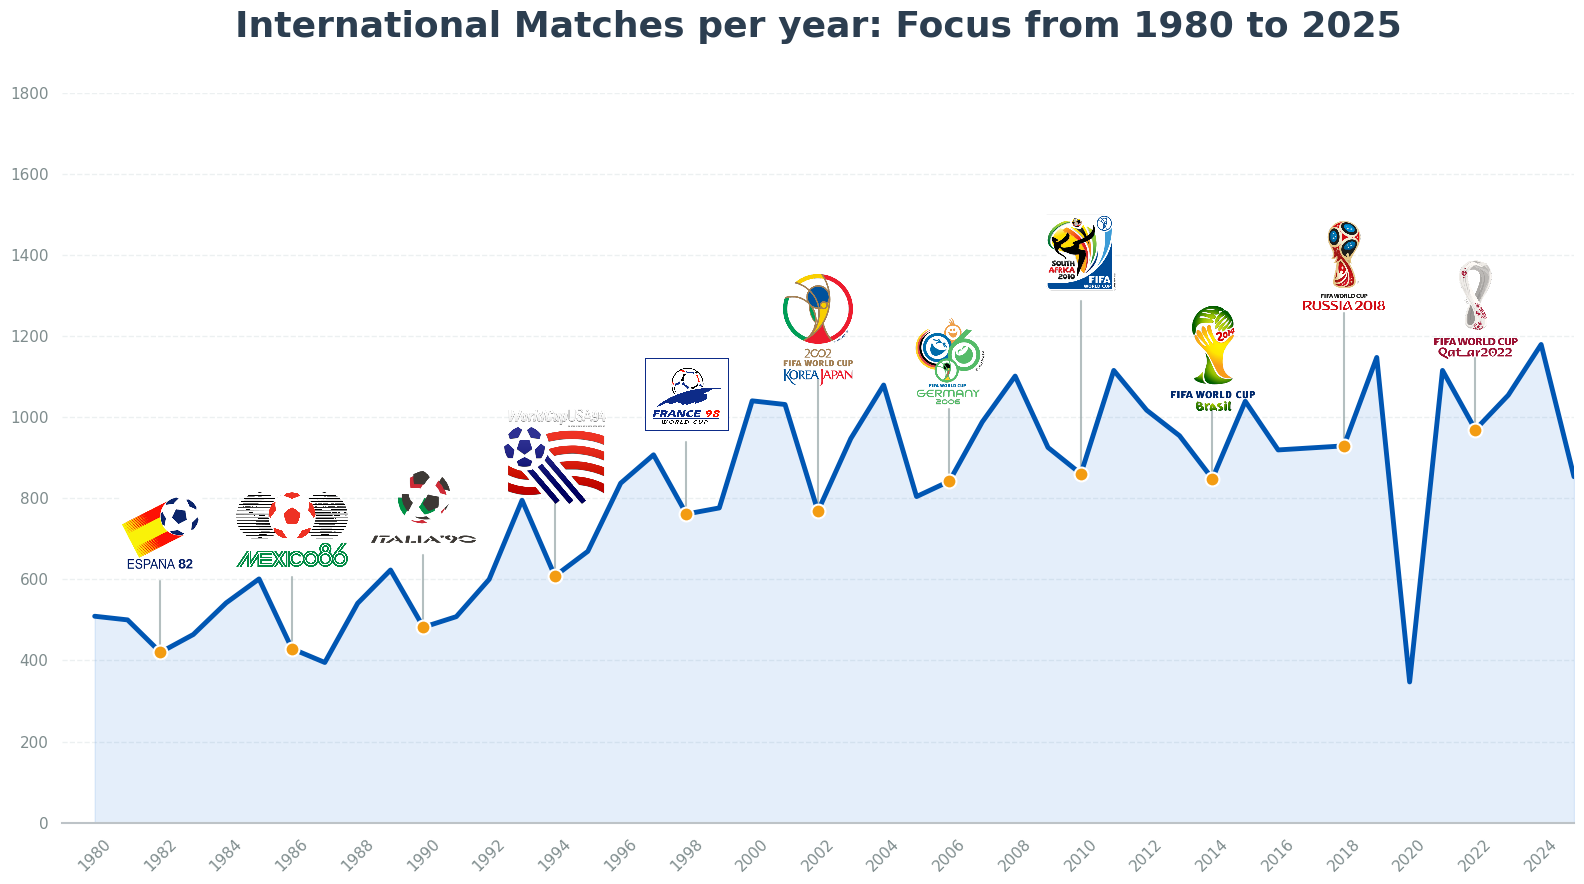

In [ ]:
# Execute once because it needs to upload all images

# Color configuration
COLOR_LINE = "#0056b3"
COLOR_FILL = "#4a90e2"
COLOR_VERTICAL = "#95a5a6"
COLOR_DOT = "#f39c12"
COLOR_TEXT = "#2c3e50"

# Style setup
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
plt.rcParams["font.family"] = "sans-serif"

fig, ax = plt.subplots(figsize=(16, 9))

# Main Chart

ax.fill_between(
    matches_recent.index,
    matches_recent.values,
    color=COLOR_FILL,
    alpha=0.15
)

# Trend line
ax.plot(
    matches_recent.index,
    matches_recent.values,
    color=COLOR_LINE,
    linewidth=3.5,
    zorder=2
)

# Base offsets for annotations
base_line_height = matches_recent.max() * 0.15
base_vertical_offset = matches_recent.max() * 0.10

# Images,Lines and points
for wc_year, config in images_config.items():
    if wc_year in matches_recent.index:
        y_val = matches_recent[wc_year]
        extra = config.get("extra_height", 0)

        final_line_top = y_val + base_line_height + extra
        final_img_pos = final_line_top + base_vertical_offset

        # Vertical guide line
        ax.plot(
            [wc_year, wc_year],
            [y_val, final_line_top],
            color=COLOR_VERTICAL,
            linewidth=1.5,
            linestyle='-',
            alpha=0.7,
            zorder=1
        )

        # Highlight point
        ax.scatter(
            wc_year,
            y_val,
            color=COLOR_DOT,
            s=100,
            zorder=4,
            edgecolor='white',
            linewidth=1.5
        )

        # Image annotation
        add_image_to_ax(
            ax,
            wc_year,
            final_img_pos,
            config["file"],
            zoom=config["zoom"]
        )

ax.set_title(
    "International Matches per year: Focus from 1980 to 2025",
    fontsize=26,
    pad=40,
    fontweight='800',
    color=COLOR_TEXT
)

# Axes configuration
ax.set_xticks(range(1980, 2026, 2))
ax.tick_params(axis='x', rotation=45, colors="#7f8c8d", labelsize=11)
ax.tick_params(axis='y', colors="#7f8c8d", labelsize=11)

# Limits
ax.set_xlim(1979, 2025)
ax.set_ylim(0, 1800)

# Grid and spines
ax.grid(axis='y', color='#ecf0f1', linestyle='--', linewidth=1)
ax.grid(axis='x', visible=False)
sns.despine(left=True, bottom=False)

ax.spines['bottom'].set_color('#bdc3c7')
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()


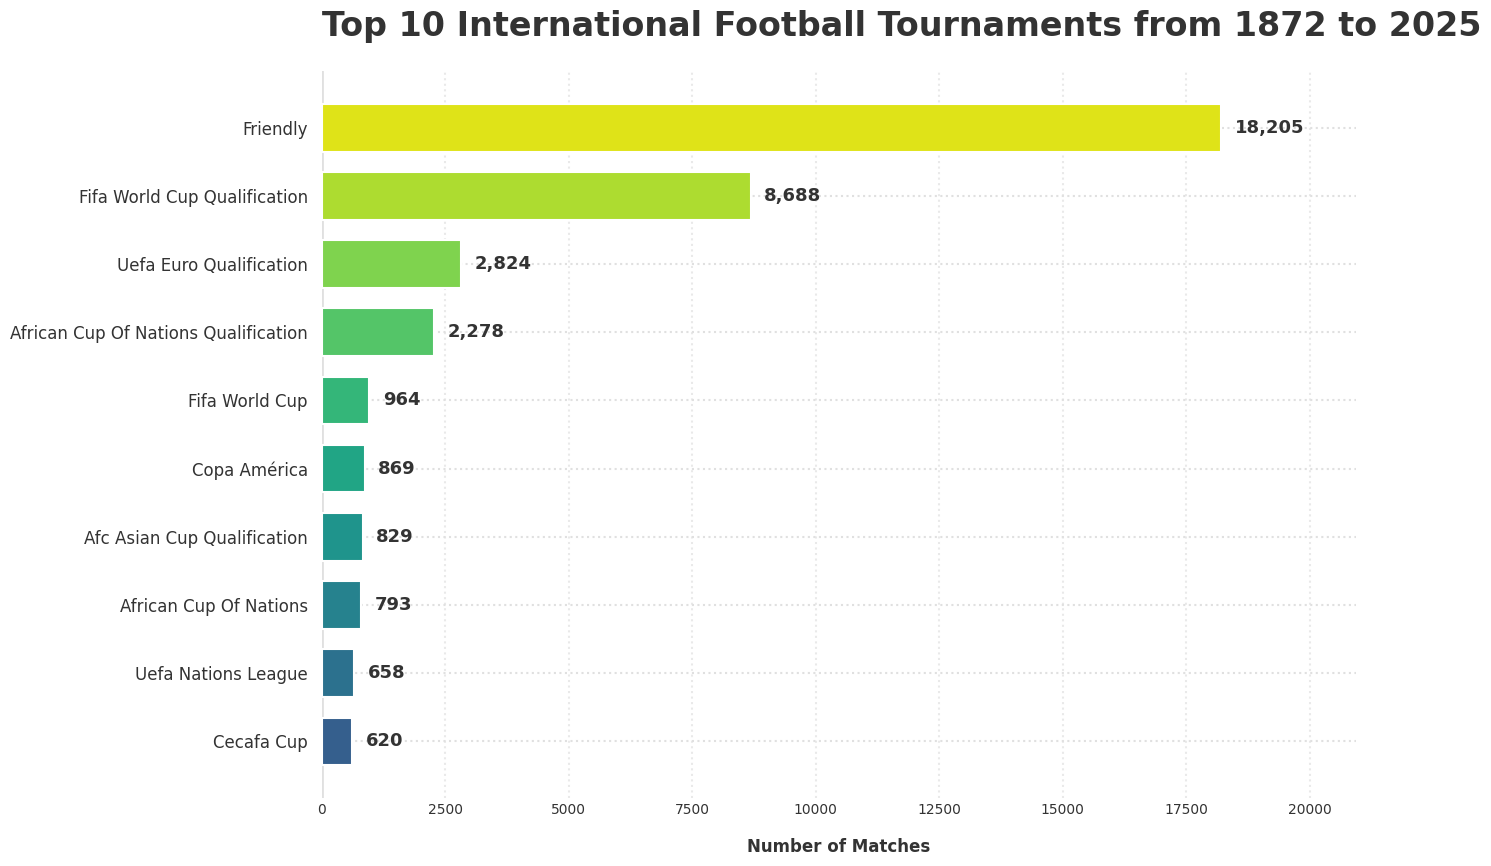

In [34]:
# Top 10 tournaments
top_tournaments = results_df['tournament'].value_counts().head(10).sort_values(ascending=True)

# Style settings
bg_color = "#FFFFFF"
text_color = "#333333"
grid_color = "#E0E0E0"
bar_cmap = "viridis"
plt.rcParams.update({
    "font.family": "sans-serif",
    "axes.facecolor": bg_color,
    "figure.facecolor": bg_color,
    "text.color": text_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "grid.color": grid_color,
    "grid.linestyle": ":"
})

# Create figure
plt.figure(figsize=(14, 9))
ax = plt.gca()

# Color gradient for bars
cmap = plt.get_cmap(bar_cmap)
colors = [cmap(i) for i in np.linspace(0.3, 0.95, len(top_tournaments))]

# Horizontal bar plot
bars = plt.barh(
    top_tournaments.index,
    top_tournaments.values,
    color=colors,
    height=0.7,
    zorder=3
)

# Add value labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + (top_tournaments.max() * 0.015),
        y,
        f'{int(width):,}',
        va='center',
        ha='left',
        fontsize=13,
        fontweight='bold',
        color=text_color
    )

# Grid and axis cleanup
plt.grid(axis='x', alpha=0.7, zorder=0)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.tick_params(axis='y', length=0, pad=10, labelsize=12)
ax.tick_params(axis='x', length=0, labelsize=10)

# Titles and labels
plt.title(
    "Top 10 International Football Tournaments from 1872 to 2025",
    fontsize=24,
    fontweight='bold',
    pad=25,
    loc='left'
)
plt.xlabel("Number of Matches", fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("")

plt.xlim(0, top_tournaments.max() * 1.15)
ax.axvline(0, color=grid_color, linewidth=2)

plt.tight_layout()
plt.show()


# **5. Which countries host the most international matches?**

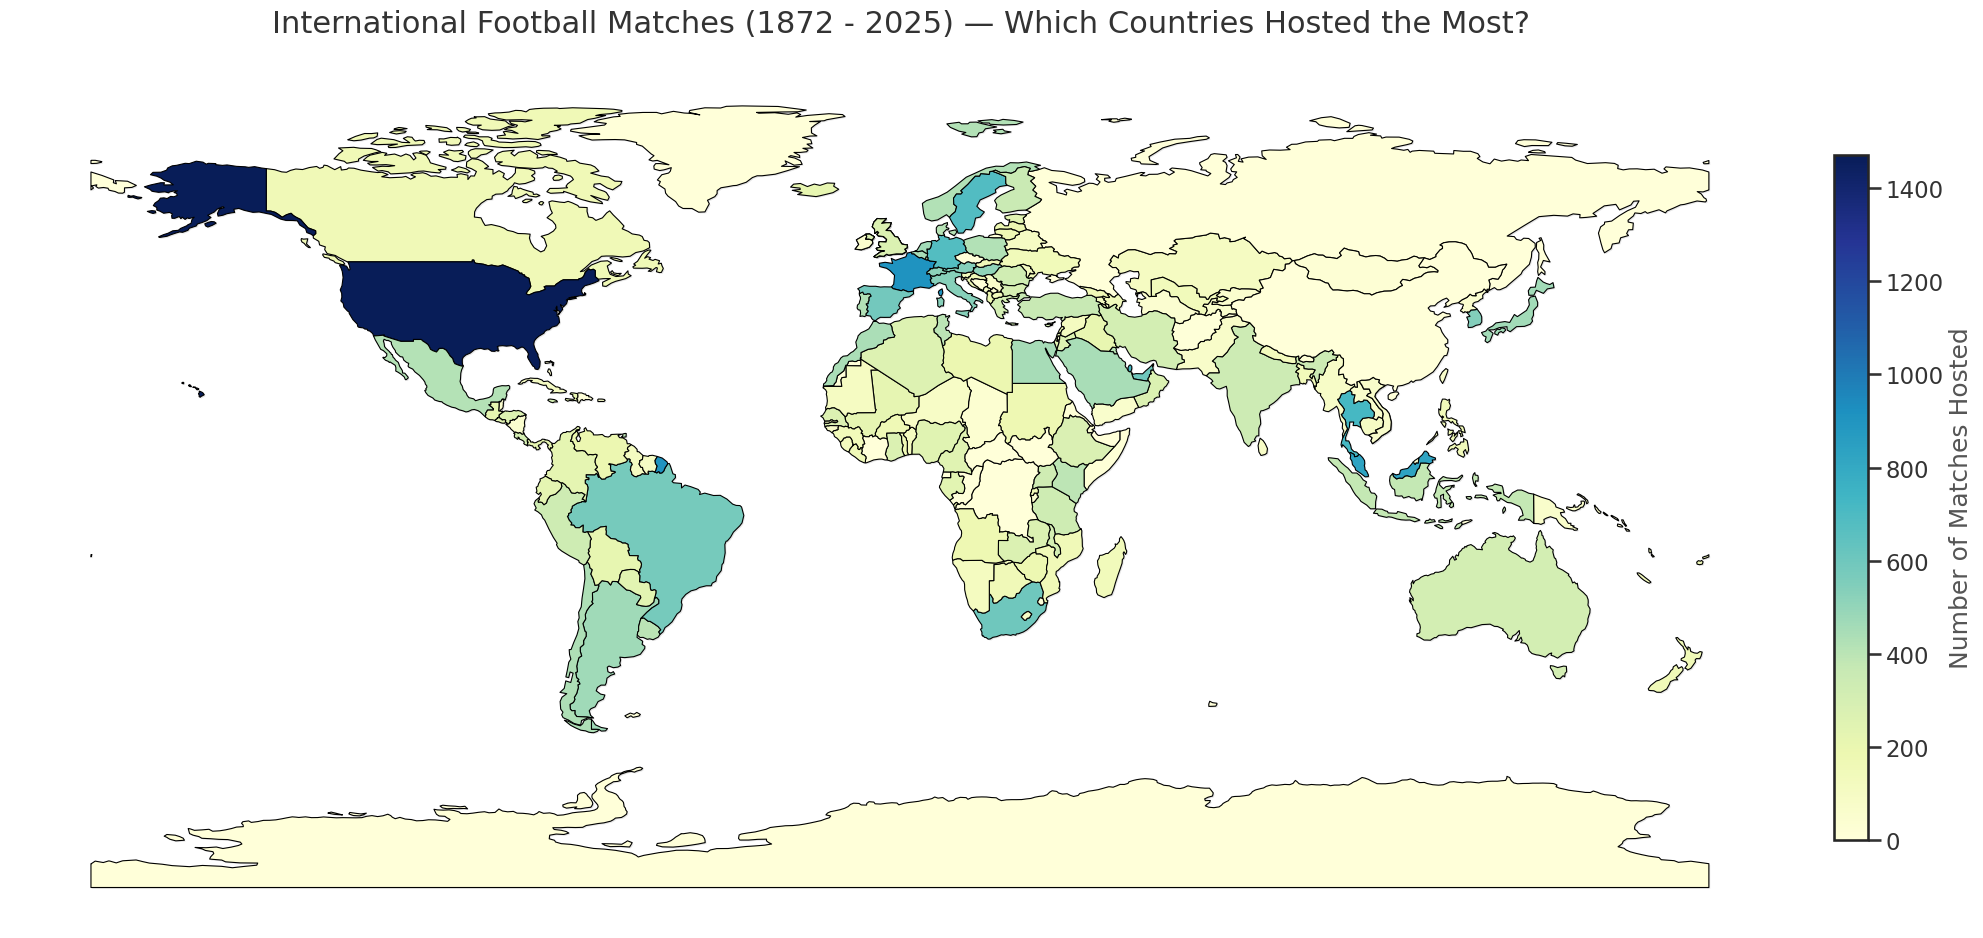

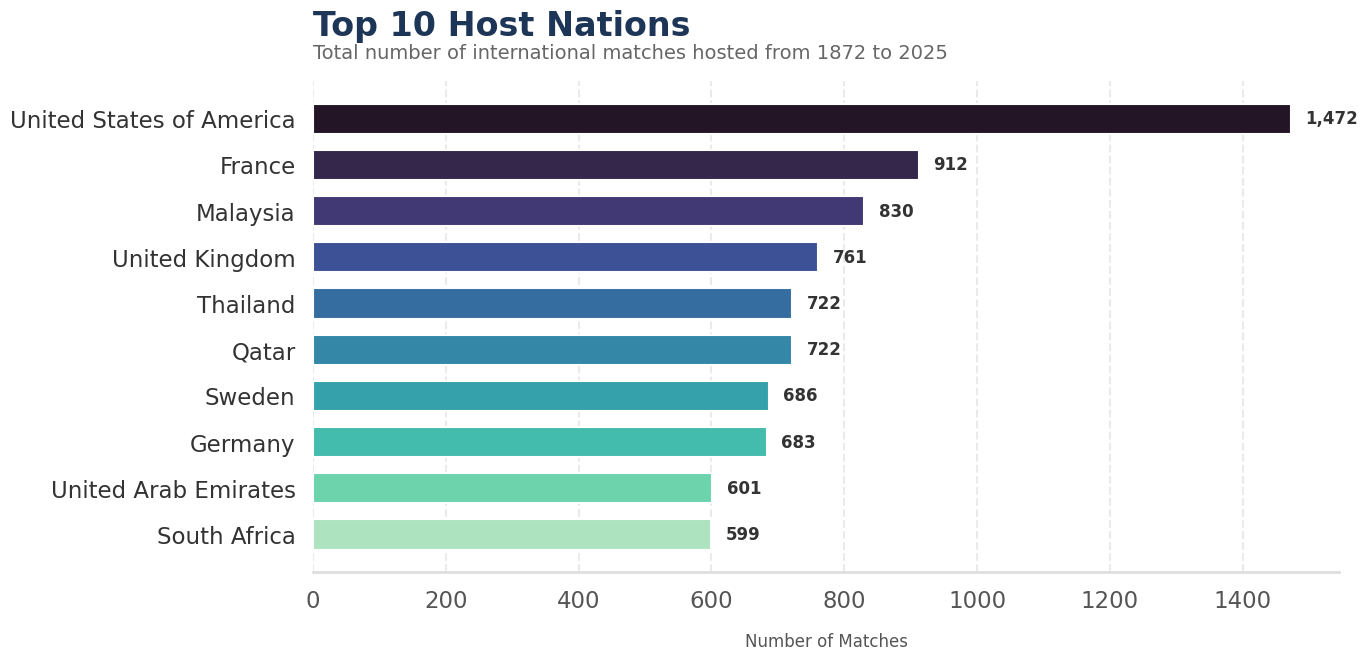

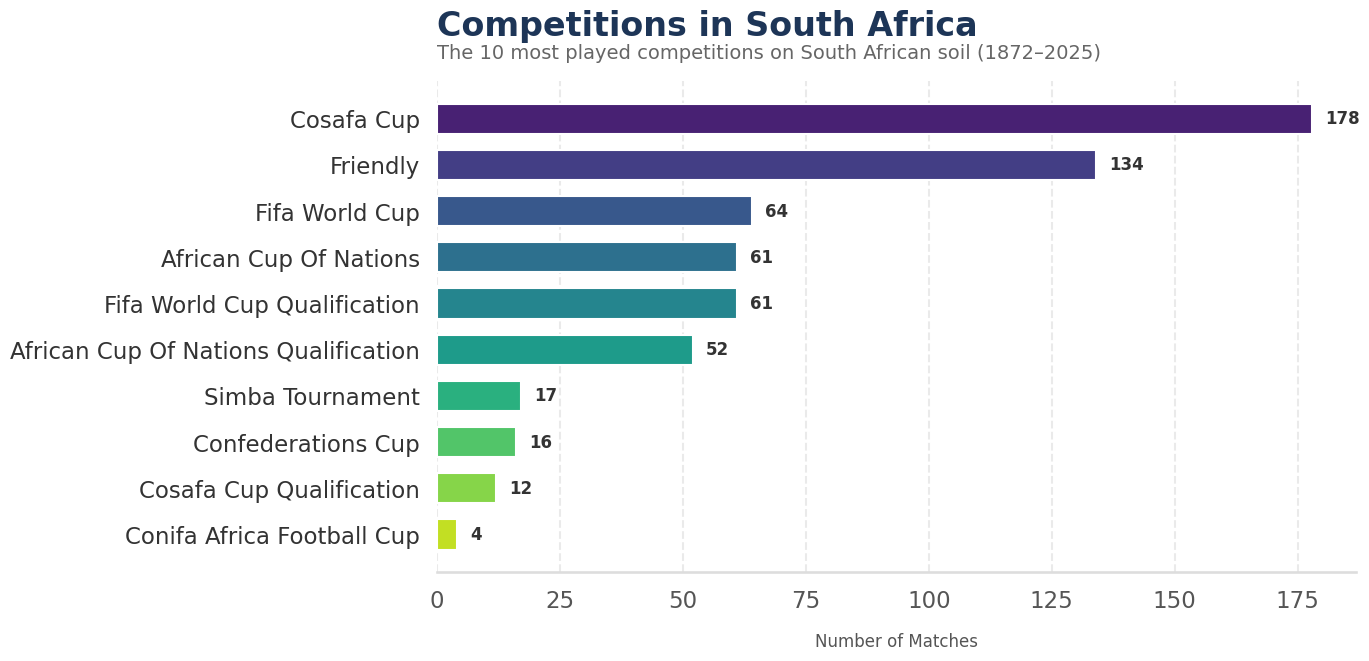

In [37]:
# Data preparation
matches_per_country = results_df['country'].value_counts().reset_index()
matches_per_country.columns = ['country', 'matches']

# Standardize country names
country_corrections = {
    "United States": "United States of America",
    "USA": "United States of America",
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Korea Republic": "South Korea",
    "Korea DPR": "North Korea",
    "Republic of Ireland": "Ireland",
    "Russia": "Russian Federation",
    "Vietnam Republic": "Vietnam",
    "Congo DR": "Democratic Republic of the Congo",
    "Congo": "Republic of the Congo"
}
matches_per_country['country'] = matches_per_country['country'].replace(country_corrections)

# World Map: Source Natural Earth (Public Domain)
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

world_matches = world.merge(matches_per_country, how='left', left_on='NAME', right_on='country')
world_matches['matches'] = world_matches['matches'].fillna(0)

fig, ax = plt.subplots(figsize=(22, 13))

shadow = world_matches.copy()
shadow['geometry'] = shadow['geometry'].translate(xoff=0.3, yoff=-0.3)
shadow.plot(ax=ax, color='gray', alpha=0.2, linewidth=0)

world_matches.plot(
    column='matches',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={
        'label': "Number of Matches Hosted",
        'orientation': "vertical",
        'shrink': 0.55,
        'pad': 0.02,
        'fmt': "%.0f"
    },
    ax=ax
)

plt.title(
    "International Football Matches (1872 - 2025) — Which Countries Hosted the Most?",
    fontsize=22, pad=25
)
plt.axis('off')
plt.tight_layout()
plt.show()

# Style Configuration
sns.set_style("white")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#555555'
plt.rcParams['xtick.color'] = '#555555'
plt.rcParams['ytick.color'] = '#333333'

def style_bar_plot(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(left=False, bottom=False)
    ax.grid(axis='x', linestyle='--', alpha=0.4, color='#CCCCCC')
    ax.set_axisbelow(True)

# Top 10 countries
top10 = matches_per_country.sort_values(by="matches", ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = plt.gca()

colors = sns.color_palette("mako", n_colors=len(top10))

bars = plt.barh(
    top10['country'][::-1],
    top10['matches'][::-1],
    color=colors[::-1],
    height=0.65
)

style_bar_plot(ax)

for bar in bars:
    width = bar.get_width()
    ax.text(
        width + (top10['matches'].max() * 0.015),
        bar.get_y() + bar.get_height() / 2,
        f'{int(width):,}',
        va='center',
        ha='left',
        fontsize=12,
        fontweight='bold',
        color="#333333"
    )

plt.text(0, len(top10) + 0.8, "Top 10 Host Nations", fontsize=24, weight='bold', color='#1d3557')
plt.text(
    0, len(top10) + 0.3,
    "Total number of international matches hosted from 1872 to 2025",
    fontsize=14, color='#666666'
)

plt.xlabel("Number of Matches", fontsize=12, labelpad=15)
plt.ylabel("")
plt.tight_layout()
plt.show()

# Top 10 competitions in South Africa
south_africa_df = results_df[results_df["country"] == "South Africa"]
sa_comp_counts = south_africa_df["tournament"].value_counts().head(10)

plt.figure(figsize=(14, 7))
ax = plt.gca()

colors_sa = sns.color_palette("viridis", n_colors=len(sa_comp_counts))

bars_sa = plt.barh(
    sa_comp_counts.index[::-1],
    sa_comp_counts.values[::-1],
    color=colors_sa[::-1],
    height=0.65
)

style_bar_plot(ax)

for bar in bars_sa:
    width = bar.get_width()
    ax.text(
        width + (sa_comp_counts.values.max() * 0.015),
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        va='center',
        ha='left',
        fontsize=12,
        fontweight='bold',
        color="#333333"
    )

plt.text(0, len(sa_comp_counts) + 0.8, "Competitions in South Africa", fontsize=24, weight='bold', color='#1d3557')
plt.text(
    0, len(sa_comp_counts) + 0.3,
    "The 10 most played competitions on South African soil (1872–2025)",
    fontsize=14, color='#666666'
)

plt.xlabel("Number of Matches", fontsize=12, labelpad=15)
plt.ylabel("")
plt.tight_layout()
plt.show()


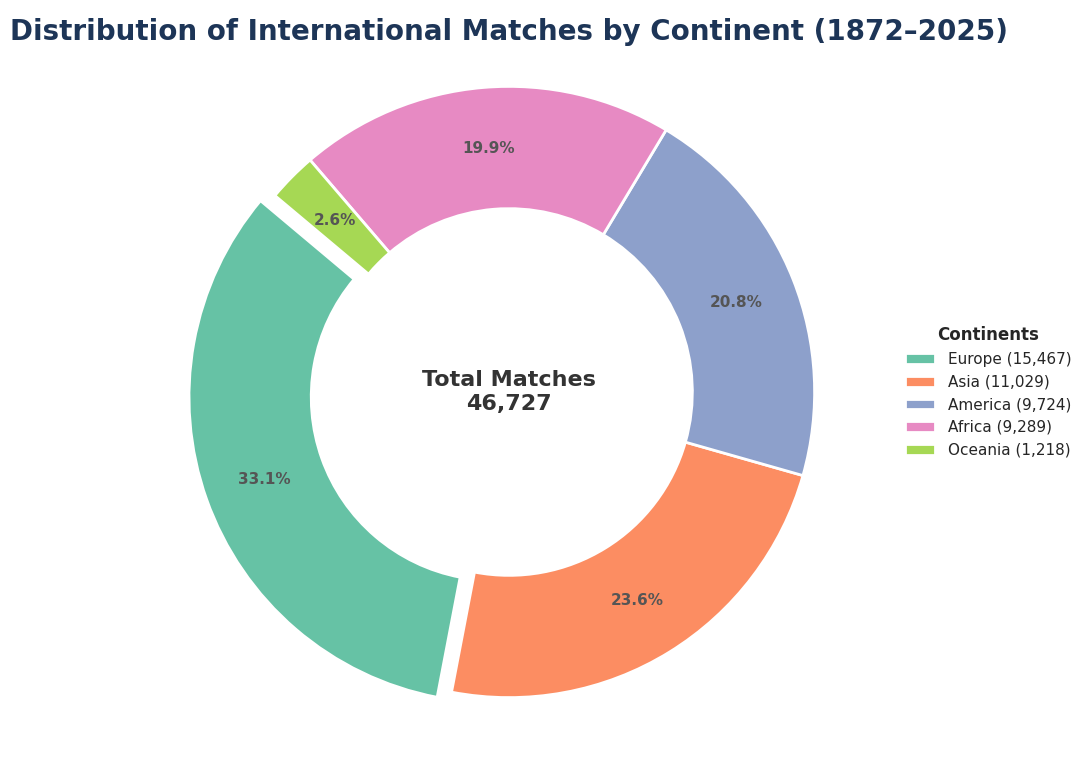

In [45]:
# Data preparation
matches_per_country = results_df['country'].value_counts().reset_index()
matches_per_country.columns = ['country', 'matches']
matches_per_country = matches_per_country.groupby('country', as_index=False).sum()

# Country name standardization
country_corrections = {
    "USA": "United States of America",
    "United States": "United States of America",
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Korea Republic": "South Korea",
    "Korea DPR": "North Korea",
    "Republic of Ireland": "Ireland",
    "Russia": "Russian Federation",
    "Vietnam Republic": "Vietnam",
    "Congo DR": "Democratic Republic of the Congo",
    "Congo": "Republic of the Congo",
    "Ivory Coast": "Côte d'Ivoire",
    "Czech Republic": "Czechia"
}
matches_per_country['country'] = matches_per_country['country'].replace(country_corrections)

# Load world map and merge
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

world_continent = world[['NAME', 'CONTINENT']].rename(
    columns={'NAME': 'country', 'CONTINENT': 'continent'}
)

matches_with_continent = matches_per_country.merge(
    world_continent, on='country', how='left'
)

# Manual continent mapping (edge cases)
manual_continent_map = {
    "Alderney": "Europe", "Andorra": "Europe", "Bosnia and Herzegovina": "Europe",
    "Faroe Islands": "Europe", "Gibraltar": "Europe", "Liechtenstein": "Europe",
    "Malta": "Europe", "Monaco": "Europe", "North Macedonia": "Europe",
    "San Marino": "Europe", "Serbia": "Europe", "Yugoslavia": "Europe",
    "Serbia and Montenegro": "Europe", "Soviet Union": "Europe", "East Germany": "Europe",
    "Czechoslovakia": "Europe", "Éire": "Europe", "Jersey": "Europe", "Guernsey": "Europe",

    "Cape Verde": "Africa", "Comoros": "Africa", "Eswatini": "Africa",
    "Gambia": "Africa", "Mauritius": "Africa", "Sao Tome and Principe": "Africa",
    "Seychelles": "Africa", "Zanzibar": "Africa", "Zaïre": "Africa", "Burkina Faso": "Africa",

    "Anguilla": "North America", "Antigua and Barbuda": "North America", "Aruba": "North America",
    "Barbados": "North America", "Bermuda": "North America", "Bonaire": "North America",
    "British Virgin Islands": "North America", "Cayman Islands": "North America",
    "Curacao": "North America", "Curaçao": "North America", "Dominica": "North America",
    "Grenada": "North America", "Guadeloupe": "North America", "Martinique": "North America",
    "Montserrat": "North America", "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America", "Saint Vincent and the Grenadines": "North America",
    "Sint Maarten": "North America", "Turks and Caicos Islands": "North America",
    "U.S. Virgin Islands": "North America", "French Guiana": "South America",

    "Bahrain": "Asia", "Hong Kong": "Asia", "Macau": "Asia", "Maldives": "Asia",
    "Palestine": "Asia", "Singapore": "Asia", "Yemen DPR": "Asia", "Timor-Leste": "Asia",

    "American Samoa": "Oceania", "Cook Islands": "Oceania", "Fiji": "Oceania",
    "Kiribati": "Oceania", "Micronesia": "Oceania", "Samoa": "Oceania",
    "Solomon Islands": "Oceania", "Tahiti": "Oceania", "Tonga": "Oceania",
    "Tuvalu": "Oceania", "Vanuatu": "Oceania"
}

matches_with_continent['continent'] = matches_with_continent['continent'].fillna(
    matches_with_continent['country'].map(manual_continent_map)
).fillna('Others')

# Reduce to 5 macro-continents
continent_mapping = {
    "Europe": "Europe",
    "Africa": "Africa",
    "Asia": "Asia",
    "Oceania": "Oceania",
    "North America": "America",
    "South America": "America",
    "Central America": "America",
    "Others": "Others"
}

matches_with_continent['continent'] = matches_with_continent['continent'].map(continent_mapping)

# Remove residual unknowns
matches_with_continent = matches_with_continent[
    matches_with_continent['continent'] != 'Others'
]

# Aggregation and visualization
continent_counts = (
    matches_with_continent
    .groupby('continent')['matches']
    .sum()
    .sort_values(ascending=False)
)

sns.set_theme(style="white")
colors = sns.color_palette("Set2", len(continent_counts))

fig, ax = plt.subplots(figsize=(12, 8))

explode = [0.05] + [0] * (len(continent_counts) - 1)

wedges, texts, autotexts = ax.pie(
    continent_counts,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    pctdistance=0.80,
    explode=explode,
    wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#555555'}
)

total_matches = continent_counts.sum()
ax.text(
    0, 0,
    f"Total Matches\n{int(total_matches):,}",
    ha='center', va='center',
    fontsize=16, fontweight='bold', color='#333333'
)

# Legend

legend_labels = [f"{c} ({v:,})" for c, v in continent_counts.items()]
plt.legend(
    wedges,
    legend_labels,
    title="Continents",
    title_fontproperties={'weight': 'bold', 'size': 12},
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    frameon=False,
    fontsize=11
)

plt.title(
    "Distribution of International Matches by Continent (1872–2025)",
    fontsize=20, fontweight='bold', color='#1d3557', y = 0.95
)

plt.tight_layout()
plt.show()
